In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [3]:
data=pd.read_excel('.\ODHP_dataset.xlsx')
data.head()

,序号,催化剂引用的文献,催化剂种类,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,...,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel,丙烯产率
0,1.0,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt/BN,Pt,1.1,2.28,NaN,NaN,NaN,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1,0.057594
1,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt/BN,Pt,1.1,2.28,NaN,NaN,NaN,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0,0.064600
2,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.25)/BN,Pt,1.1,2.28,Sn,0.25,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9,0.317031
3,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.25)/BN,Pt,1.1,2.28,Sn,0.25,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3,0.067140
4,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.50)/BN,Pt,1.1,2.28,Sn,0.50,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2,0.375408


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   序号        101 non-null    float64
 1   催化剂引用的文献  514 non-null    object 
 2   催化剂种类     513 non-null    object 
 3   金属1       305 non-null    object 
 4   占比1       305 non-null    float64
 5   金属1电负性    60 non-null     float64
 6   金属2       19 non-null     object 
 7   占比2       19 non-null     float64
 8   金属2电负性    12 non-null     float64
 9   非金属1      225 non-null    object 
 10  占比3       225 non-null    float64
 11  负载1       367 non-null    object 
 12  占比4       367 non-null    float64
 13  C2H6      11 non-null     float64
 14  C3H8      514 non-null    float64
 15  O2        514 non-null    float64
 16  保护气体      514 non-null    float64
 17  金属基       255 non-null    float64
 18  形态        514 non-null    int64  
 19  GHSV      376 non-null    float64
 20  温度        514 non-null    int64 

In [5]:
data=data.loc[:,'金属1':'Sel']
data

,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,占比3,负载1,占比4,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,Pt,1.10,2.28,NaN,NaN,NaN,BN,98.90,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1
1,Pt,1.10,2.28,NaN,NaN,NaN,BN,98.90,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0
2,Pt,1.10,2.28,Sn,0.25,1.96,BN,98.65,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9
3,Pt,1.10,2.28,Sn,0.25,1.96,BN,98.65,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3
4,Pt,1.10,2.28,Sn,0.50,1.96,BN,98.40,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Mo,4.27,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,95.73,NaN,29.4,9.6,61.0,1.0,2,NaN,605,5.0,77.0
510,Mo,9.38,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,90.62,NaN,29.4,9.6,61.0,1.0,2,NaN,597,5.0,80.0
511,Mo,14.80,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,85.20,NaN,29.4,9.6,61.0,1.0,2,NaN,633,5.0,78.0
512,Mo,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4,9.6,61.0,1.0,1,NaN,629,5.0,64.0


In [6]:
data.loc[:,'GHSV'].fillna(data.loc[:,'GHSV'].mean(),inplace=True)
data.loc[:,'Con'].fillna(data.loc[:,'Con'].mean(),inplace=True)
data.loc[:,'Sel'].fillna(data.loc[:,'Sel'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   金属1     305 non-null    object 
 1   占比1     305 non-null    float64
 2   金属1电负性  60 non-null     float64
 3   金属2     19 non-null     object 
 4   占比2     19 non-null     float64
 5   金属2电负性  12 non-null     float64
 6   非金属1    225 non-null    object 
 7   占比3     225 non-null    float64
 8   负载1     367 non-null    object 
 9   占比4     367 non-null    float64
 10  C2H6    11 non-null     float64
 11  C3H8    514 non-null    float64
 12  O2      514 non-null    float64
 13  保护气体    514 non-null    float64
 14  金属基     255 non-null    float64
 15  形态      514 non-null    int64  
 16  GHSV    514 non-null    float64
 17  温度      514 non-null    int64  
 18  Con     514 non-null    float64
 19  Sel     514 non-null    float64
dtypes: float64(14), int64(2), object(4)
memory usage: 80.4+ KB


In [7]:
data1 = list(set(pd.concat([data.iloc[:, 0], data.iloc[:, 3]])))
data1

[nan, 'K', 'Ti', 'Ni', 'W', 'Sn', 'Mo', 'Li', 'Pt', 'Na', 'Hf', 'V', 'Mg']

In [8]:
data_1 = pd.DataFrame(np.zeros((514, 13)), columns=data1)
data_1

,NaN,K,Ti,Ni,W,Sn,Mo,Li,Pt,Na,Hf,V,Mg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
num_1 = 0
for i in data.iloc[:, 0]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 1]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 3]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 4]
        num_1 = num_1 + 1
data_1 = data_1.dropna(axis=1)

In [10]:
data2 = list(set(data.iloc[:, 6]))
len(data2)

10

In [11]:
data_2 = pd.DataFrame(np.zeros((514, 10)), columns=data2)

In [12]:
num_1 = 0
for i in data.iloc[:, 6]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 7]
        num_1 = num_1 + 1
data_2 = data_2.dropna(axis=1)

In [13]:
data_2.head()

,BN,C,BPO4,BON,B,P,Si,B2O3,CB
0,98.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,98.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data3 = list(set(data.iloc[:, 8]))
len(data3)

18

In [15]:
data_3 = pd.DataFrame(np.zeros((514,18)), columns=data3)

In [16]:
num_1 = 0
for i in data.iloc[:, 8]:
    if i in data3:
        index_2 = data3.index(i)
        index_1 = num_1
        data_3.iloc[index_1, index_2] = data.iloc[num_1, 9]
        num_1 = num_1 + 1
data_3 = data_3.dropna(axis=1)

In [17]:
data_3

,SiO2,C,Nb2O5,S-1,BPO4,MCF,Si,TiO2,Al2O3,MCM,HMS,MgO,CeO2,MCM-41,SBA-16,SBA-15,ZrO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_use=pd.concat([data_1,data_2,data_3,data.loc[:,'C2H6':'Sel']],axis=1)
data_use

,K,Ti,Ni,W,Sn,Mo,Li,Pt,Na,Hf,...,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.1,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,17.4,33.1
1,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.1,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,19.0,34.0
2,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.1,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,42.9,73.9
3,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.1,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,18.0,37.3
4,0.0,0.0,0.0,0.0,0.50,0.00,0.0,1.1,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.000000,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.0,0.0,0.0,0.00,4.27,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,2,26509.106383,605,5.0,77.0
510,0.0,0.0,0.0,0.0,0.00,9.38,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,2,26509.106383,597,5.0,80.0
511,0.0,0.0,0.0,0.0,0.00,14.80,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,2,26509.106383,633,5.0,78.0
512,0.0,0.0,0.0,0.0,0.00,100.00,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,1,26509.106383,629,5.0,64.0


In [19]:
data_use.fillna(0,inplace=True)
data_use=data_use.drop(['金属基'],axis=1)
data_use

,K,Ti,Ni,W,Sn,Mo,Li,Pt,Na,Hf,...,ZrO2,C2H6,C3H8,O2,保护气体,形态,GHSV,温度,Con,Sel
0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.1,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,17.4,33.1
1,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.1,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,19.0,34.0
2,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.1,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,42.9,73.9
3,0.0,0.0,0.0,0.0,0.25,0.00,0.0,1.1,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,18.0,37.3
4,0.0,0.0,0.0,0.0,0.50,0.00,0.0,1.1,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.000000,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.0,0.0,0.0,0.00,4.27,0.0,0.0,0.0,0.0,...,0.0,0.0,29.4,9.6,61.0,2,26509.106383,605,5.0,77.0
510,0.0,0.0,0.0,0.0,0.00,9.38,0.0,0.0,0.0,0.0,...,0.0,0.0,29.4,9.6,61.0,2,26509.106383,597,5.0,80.0
511,0.0,0.0,0.0,0.0,0.00,14.80,0.0,0.0,0.0,0.0,...,0.0,0.0,29.4,9.6,61.0,2,26509.106383,633,5.0,78.0
512,0.0,0.0,0.0,0.0,0.00,100.00,0.0,0.0,0.0,0.0,...,0.0,0.0,29.4,9.6,61.0,1,26509.106383,629,5.0,64.0


In [20]:
data_use.to_csv('use.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


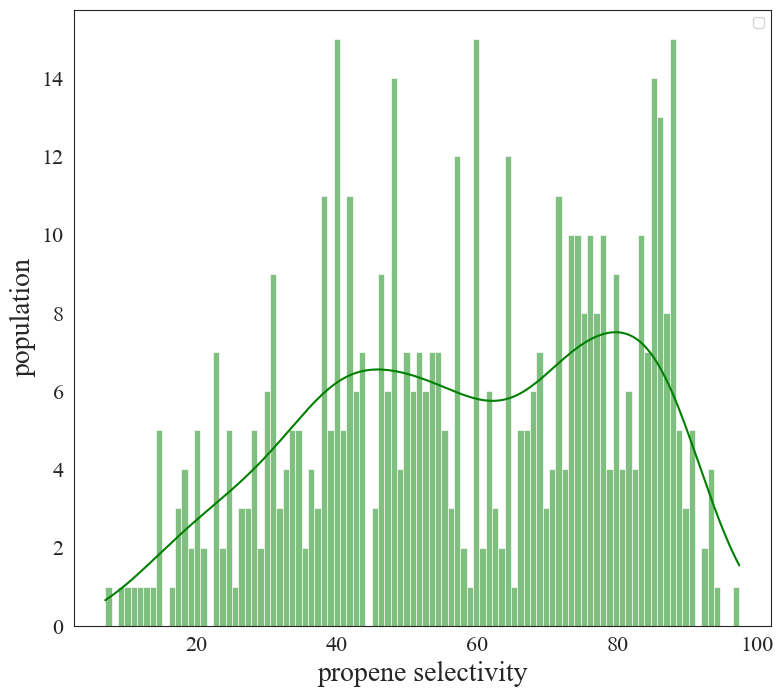

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(9,8))
sns.histplot(data_use['Sel'],color='g',bins=100,kde=True)
plt.xlabel('propene selectivity',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('population',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.legend()
plt.show()

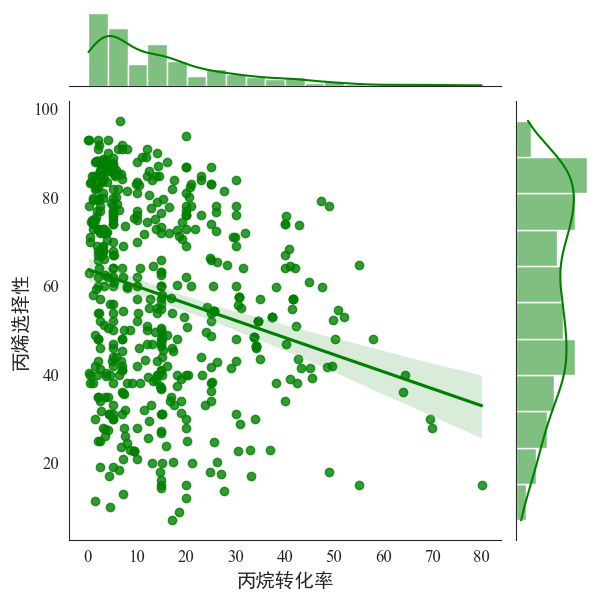

In [22]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.jointplot(x="Con",y="Sel",data=data,kind='reg',color='g')
plt.xlabel('丙烷转化率',fontsize=14)
plt.ylabel('丙烯选择性',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()

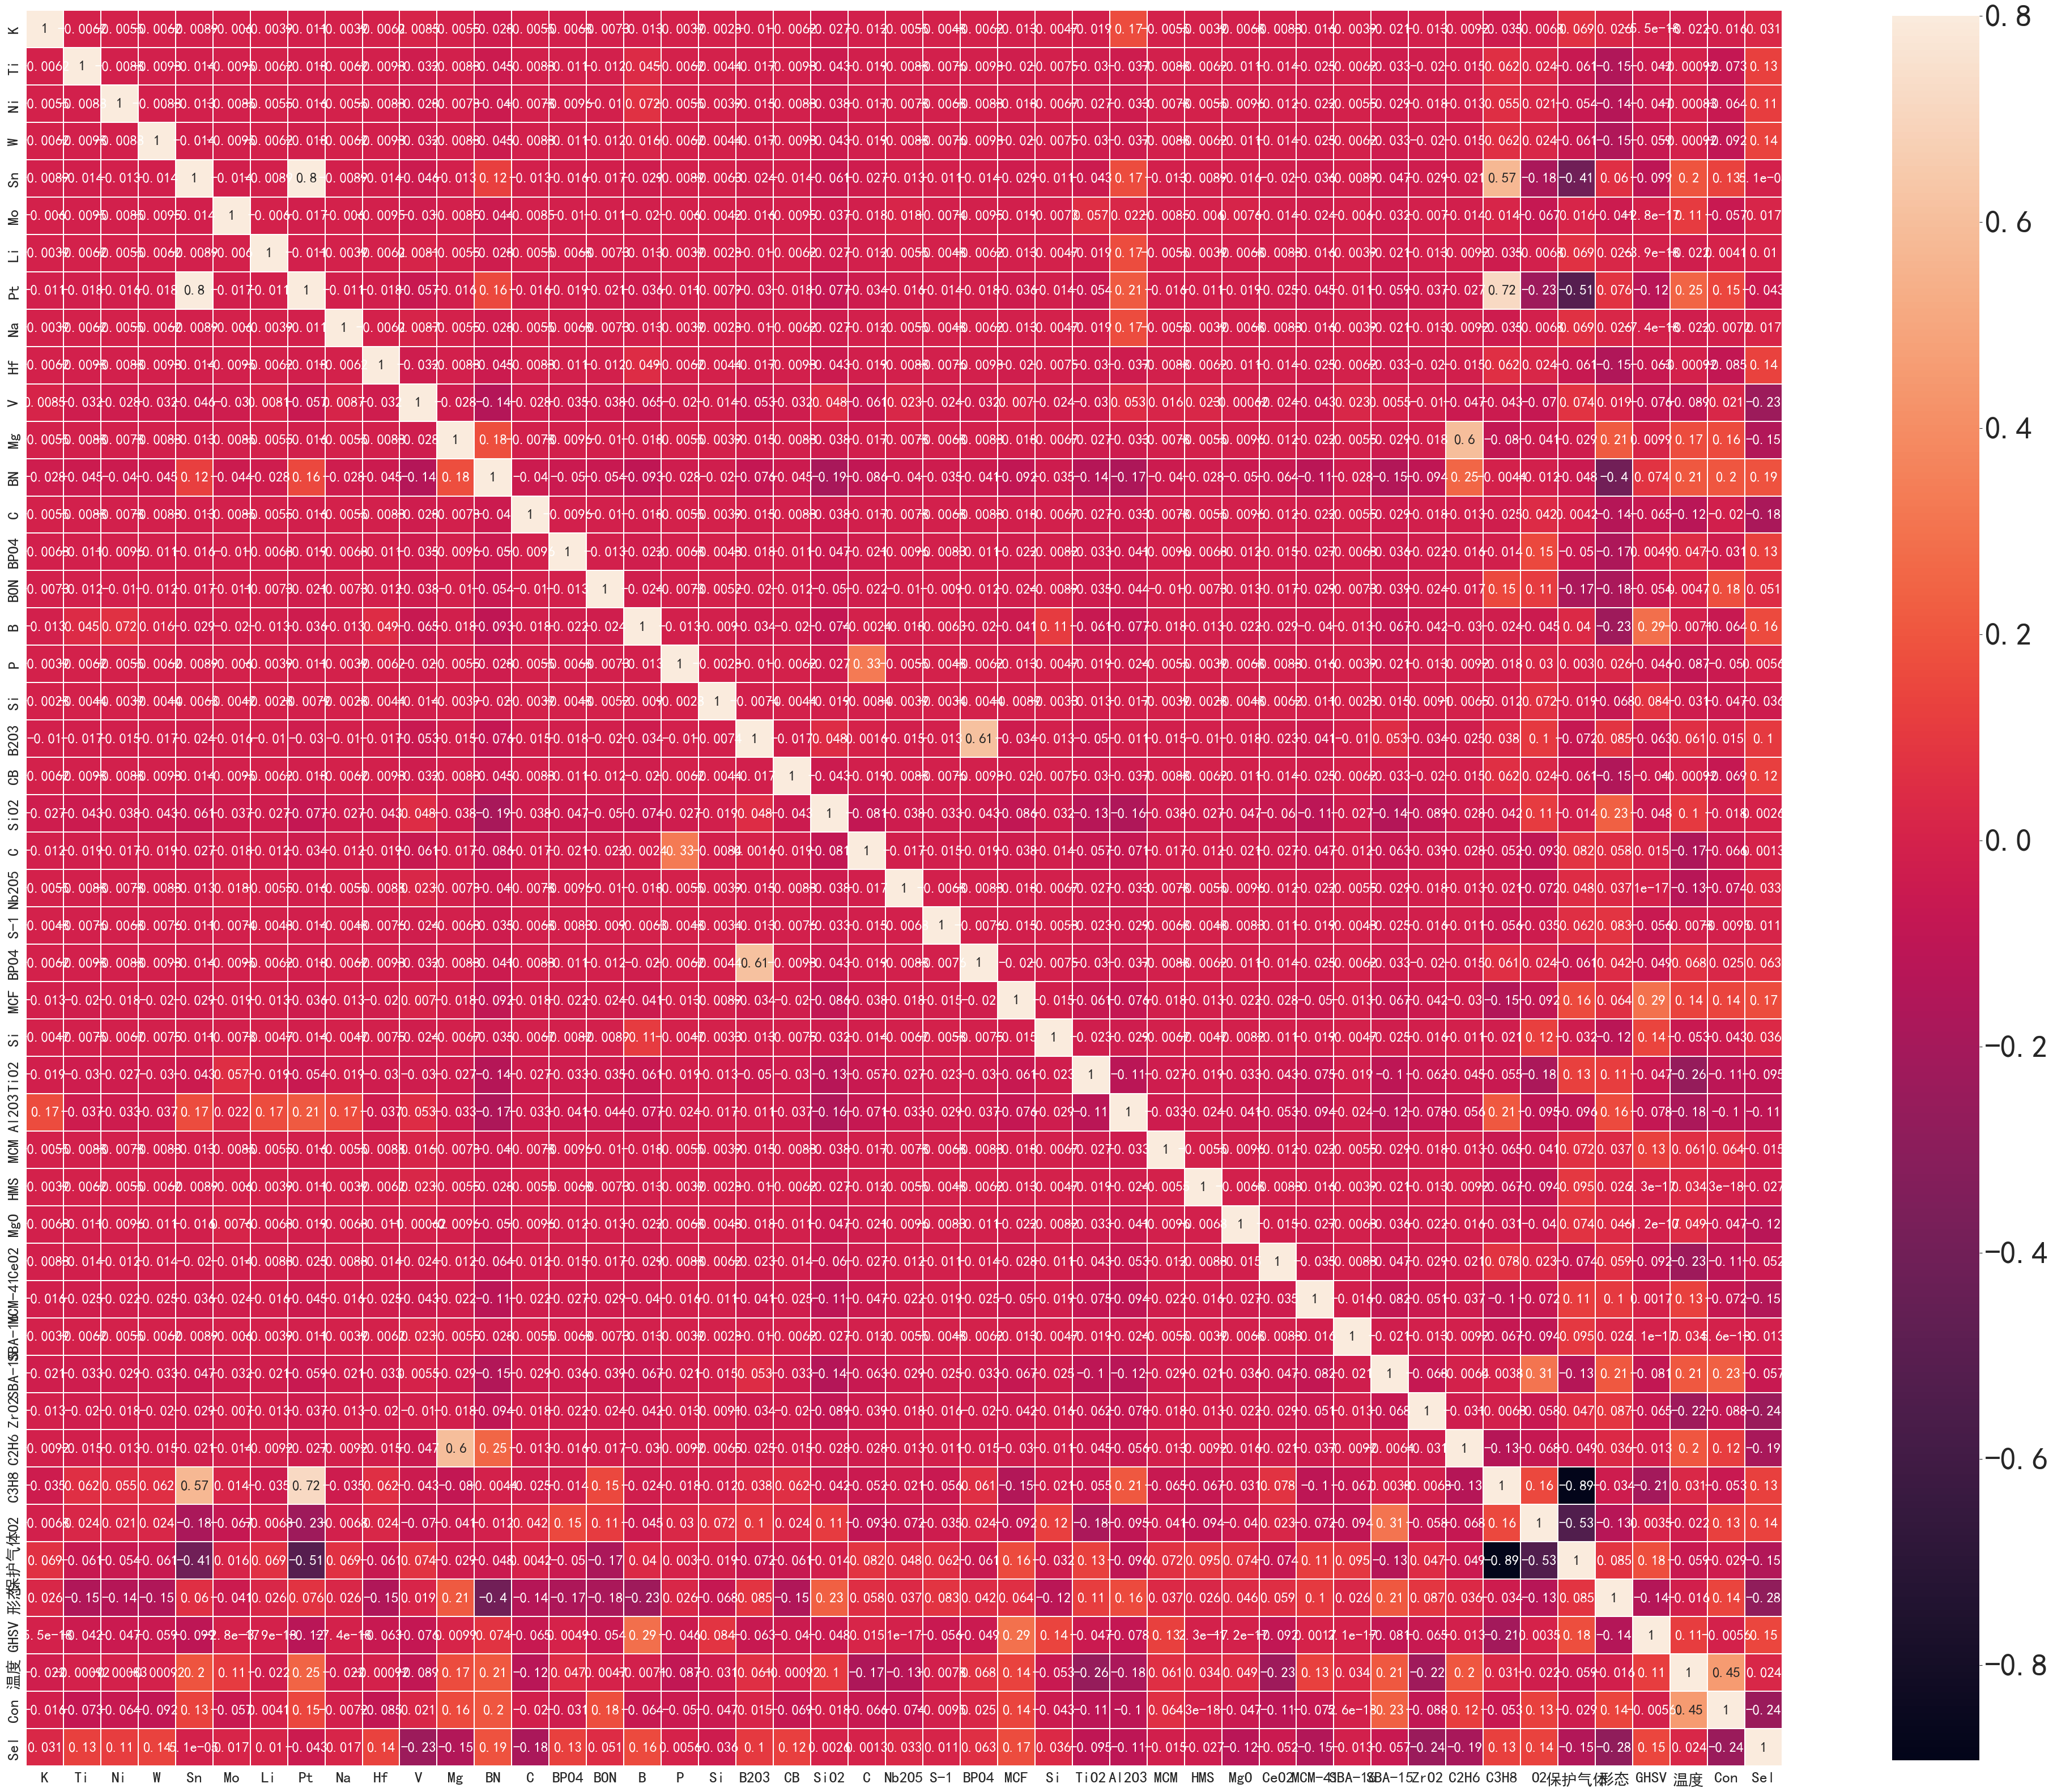

In [23]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data_use.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()